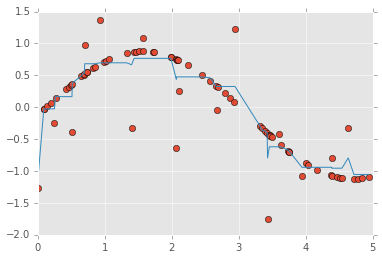

In [22]:
# Simple gradient boosted tree model

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn import tree
mpl.style.available
mpl.style.use('ggplot')
%matplotlib inline

# Generate sine curve with some noise
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
Y = np.sin(X).ravel()
Y[::5] += 3 * (0.5 - rng.rand(16))


# Subtract mean
mu = np.mean(Y)
Y=Y-mu

def take_step(nb_steps,learn_rate=1,learn_decay=0):
    predict = np.zeros(len(Y))
    # Y_it are the residuals at given iteration
    Y_it = Y
    for k in range(nb_steps):
        # Calculate new learning rate at each step
        alpha=learn_rate*np.exp(-learn_decay*k)
        # Fit a simple tree to the residuals
        reg=tree.DecisionTreeRegressor(min_samples_split=10,max_depth=1,max_leaf_nodes=2)
        reg.fit(X,Y_it)
        res_pred=reg.predict(X)
        # Calculates the new residuals
        Y_it = Y_it - alpha*res_pred
        # Add prediction of residuals to overall prediction
        predict += alpha*res_pred

    return predict

Y_gradient_boosted = take_step(100,learn_rate=0.5,learn_decay=0.01)

plt.plot(X,Y,'o',X,Y_gradient_boosted,'-') 